Mean Squared Error: 0.26
Root Mean Squared Error: 0.51
R-squared: 0.81


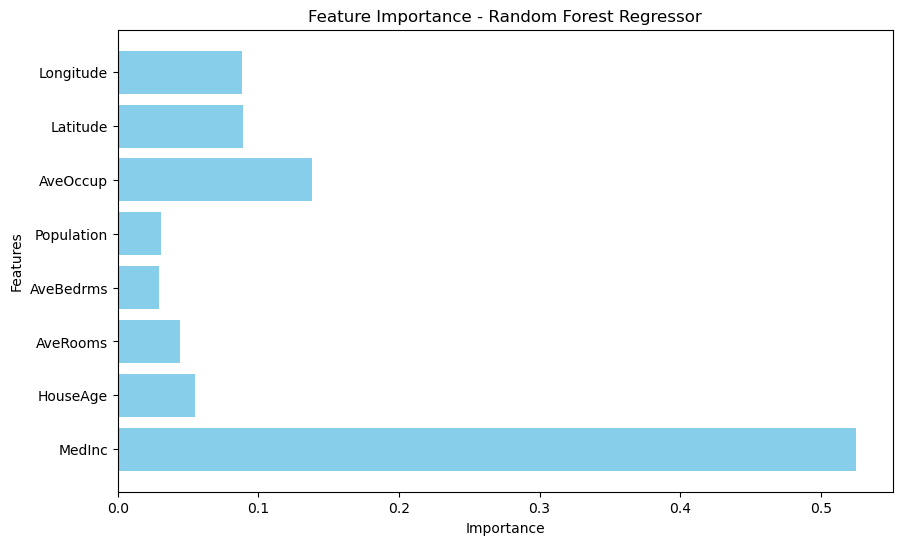

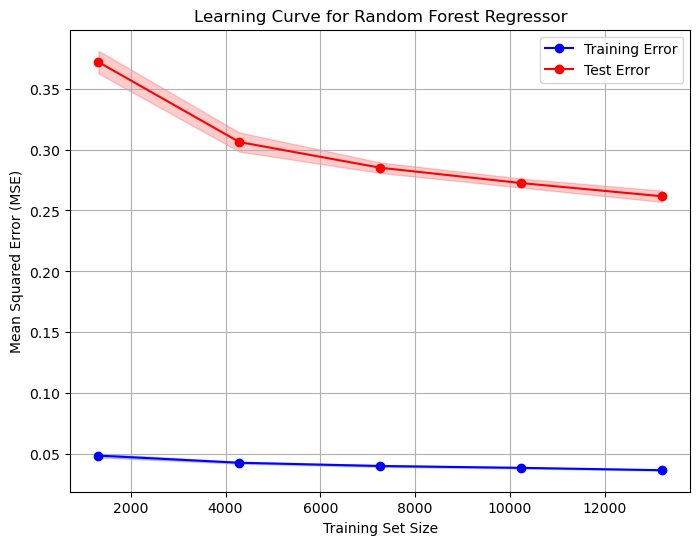

In [10]:
# Random Forest Regression Implementation

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rfr.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance visualization
feature_importances = rfr.feature_importances_

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importances, color='skyblue')
plt.title('Feature Importance - Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("Feature Importance - Random Forest Regressor.png") 
plt.show()

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(rfr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and std deviation for train and test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        # Plotting the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Test Error', color='red', marker='o')

# Add fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curve for Random Forest Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.savefig("Learning Curve for Random Forest Regressor.png") 
plt.show()

